# Scratch File for Shawn. No one else should edit or check in.

In [309]:
%load_ext autoreload
%autoreload 2
import shared_utils as su
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [256]:
trip_data = su.read_trip_data(False)
trip_data.head()

,Trip_ID,Duration,Start_Date,Start_Station,Start_Terminal,End_Date,End_Station,End_Terminal,Bike_#,Subscriber_Type,Zip_Code
0,913460,765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),50,8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th),70,288,Subscriber,2139
1,913459,1036,8/31/2015 23:11,San Antonio Shopping Center,31,8/31/2015 23:28,Mountain View City Hall,27,35,Subscriber,95032
2,913455,307,8/31/2015 23:13,Post at Kearny,47,8/31/2015 23:18,2nd at South Park,64,468,Subscriber,94107
3,913454,409,8/31/2015 23:10,San Jose City Hall,10,8/31/2015 23:17,San Salvador at 1st,8,68,Subscriber,95113
4,913453,789,8/31/2015 23:09,Embarcadero at Folsom,51,8/31/2015 23:22,Embarcadero at Sansome,60,487,Customer,9069


In [257]:
station_data = su.read_station_data()

Basing anything on a customers zip code seems to require some cleaning up of that field. Rather than replace the field values I've opted to create a new column with scrubbed data.

In [258]:
su.clean_zip_codes(trip_data)

In [313]:
# Counts of how often a customer is from a san francisco zip code
zip_code_trip_counts = su.get_trip_counts_by_zip_code(trip_data)

# Counts of how many stations are in a zip code
zip_code_station_counts = su.get_station_counts_by_zip_code(station_data)
#sf_only_customer_trip_data = trip_data.groupby("Clean_Zip_Code").filter(lambda x: x.name in su.SF_ZIP_CODES)
#sf_only_customer_trip_data = trip_data[trip_data.Clean_Zip_Code.map(lambda x : x in su.SF_ZIP_CODES)]

# why couldn't i reset indexes and do: zip_code_trip_counts.join(zip_code_station_counts, on="Zip_Code") 
trip_and_station_counts = zip_code_trip_counts.join(zip_code_station_counts)
trip_and_station_counts.fillna(0, inplace=True)

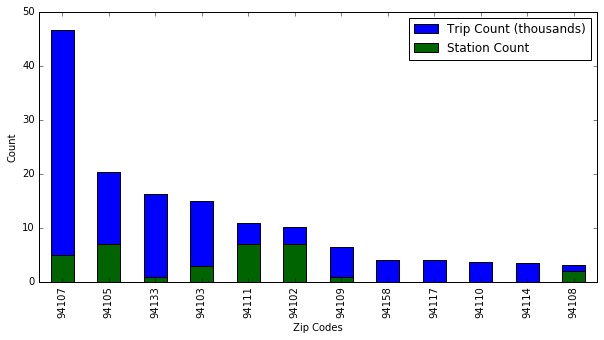

In [315]:
graphable_data = trip_and_station_counts.head(12).copy()
graphable_data.Trip_Count = graphable_data.Trip_Count / 1000
graphable_data.index = [int(x) for x in graphable_data.index]
ax = graphable_data.Trip_Count.plot(kind="bar", label="Trip Count (thousands)", legend=True, figsize=(10,5))
graphable_data.Station_Count.plot(kind="bar", label="Station Count", color="DarkGreen", legend=True)
ax.set_xlabel("Zip Codes")
ax.set_ylabel("Count")
# prevents the x label from getting cut off in png file
plt.gcf().subplots_adjust(bottom=0.15)
fig = ax.get_figure()
fig.savefig('trips_no_stations.png')

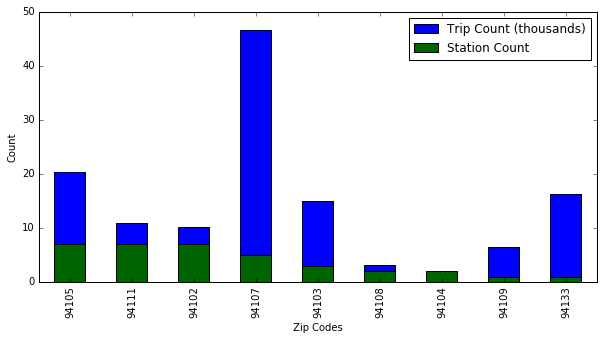

In [326]:
graphable_data = trip_and_station_counts.sort_values("Station_Count", ascending=False).head(9).copy()
graphable_data.Trip_Count = graphable_data.Trip_Count / 1000
graphable_data.index = [int(x) for x in graphable_data.index]
ax = graphable_data.Trip_Count.plot(kind="bar", label="Trip Count (thousands)", legend=True, figsize=(10,5))
graphable_data.Station_Count.plot(kind="bar", label="Station Count", color="DarkGreen", legend=True)
ax.set_xlabel("Zip Codes")
ax.set_ylabel("Count")
plt.gcf().subplots_adjust(bottom=0.15)
fig = ax.get_figure()
fig.savefig('ordered_by_station_count.png')

In [324]:
graphable_data

,Trip_Count,Station_Count
94105,20.311,7
94111,10.960,7
94102,10.150,7
94107,46.629,5
94103,14.983,3
94108,3.120,2
94104,1.359,2
94109,6.413,1
94133,16.246,1
94134,0.114,0


In [118]:
zip_df = su.read_zip_code_data()
zip_df[(zip_df.latitude == 37.79) & (zip_df.longitude == -122.39) & (zip_df.type=='STANDARD')]

,zip,type,primary_city,acceptable_cities,unacceptable_cities,state,county,timezone,area_codes,latitude,longitude,world_region,country,decommissioned,estimated_population,notes
39607,94111,STANDARD,San Francisco,NaN,NaN,CA,San Francisco County,America/Los_Angeles,415510650,37.79,-122.39,NaN,US,0,3905,NaN


In [ ]:
# wanted to get zip codes based of long and lat, but the us postal service data either didn't have entries for every 
# one of our values or had too many entries for each value. I spent more time mucking with it than it took to just add
# the zip codes by hand for the san francisco stations.
#station_data["Zip_Code"] = [""] * len(station_data)

def proccess_station_row(row):  
    df = zip_df[(zip_df.latitude == round(row.lat,2)) & (zip_df.longitude == round(row.long, 2)) & (zip_df.type=='STANDARD')]
    if len(df) == 1:
        result = df.zip.iloc[0]
    else:
        result = np.NaN
    return result

station_data.apply(proccess_station_row, axis=1)


In [175]:
station_data[station_data.landmark == "San Francisco"]

,station_id,name,lat,long,dockcount,landmark,installation,Zip_Code
32,41,Clay at Battery,37.795001,-122.399970,15,San Francisco,2013-08-19,94111
33,42,Davis at Jackson,37.797280,-122.398436,15,San Francisco,2013-08-19,94111
34,45,Commercial at Montgomery,37.794231,-122.402923,15,San Francisco,2013-08-19,94111
35,46,Washington at Kearney,37.795425,-122.404767,15,San Francisco,2013-08-19,94108
36,47,Post at Kearney,37.788975,-122.403452,19,San Francisco,2013-08-19,94108
37,48,Embarcadero at Vallejo,37.799953,-122.398525,15,San Francisco,2013-08-19,94111
38,49,Spear at Folsom,37.790302,-122.390637,19,San Francisco,2013-08-20,94105
39,50,Harry Bridges Plaza (Ferry Building),37.795392,-122.394203,23,San Francisco,2013-08-20,94105
40,51,Embarcadero at Folsom,37.791464,-122.391034,19,San Francisco,2013-08-20,94105
41,39,Powell Street BART,37.783871,-122.408433,19,San Francisco,2013-08-25,94102
